# <font color="White"><b>ML Case Study - Titanic Survival Prediction</b></font>

In [ ]:
! pip install -q kaggle
! pip install seaborn
! pip install -U scikit-learn
! pip install statsmodels

In [ ]:
! pip install category_encoders

In [ ]:
### Upload kaggle.json file downloaded from Kaggle account (https://www.kaggle.com/general/74235)
from google.colab import files
files.upload()

In [ ]:
### Upload kaggle.json file downloaded from Kaggle account (https://www.kaggle.com/general/74235)
from google.colab import files
files.upload()

In [ ]:
### Download dataset - Titanic Survival Prediction (https://www.kaggle.com/datasets/brendan45774/test-file)
! kaggle datasets download -d caesarmario/survival-prediction-w-various-ml-models -p /path/to/dest
### Unzip downloaded Dataset
! unzip /path/to/dest

In [ ]:
### Importing the libraries
import numpy as np
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pandas_profiling
%matplotlib inline


from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')


## About Dataset



##### I took the titanic test and train dataset put them in excel to make a csv. This is great for making charts to help me to visualize. This also will help me to know who died or survived. At least 70% right.


#####There are 12 variables in this dataset: 

    4 categorical variables,
    4 continuous variables,
    1 variable that contains ID of passenger,
    1 variable to accommodate the name of passenger,
    1 variable that stores ticket number, and
    1 variable with various cabin number.



In [ ]:
"""Reading Dataset"""

In [ ]:
# --- Importing Datasets ---
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("Titanic test Data Size  :" ,df_test.size)
print("Titanic test Data Shape :" ,df_test.shape)

print("Titanic train Data Size  :" ,df_train.size)
print("Titanic train Data Shape :" ,df_train.shape)

Titanic test Data Size  : 4598
Titanic test Data Shape : (418, 11)
Titanic train Data Size  : 10692
Titanic train Data Shape : (891, 12)


In [ ]:
### Describe the dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
### Describe the dataset
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#Data-Preprocessing

df = df_train.append(df_test)
print("Total no of new df's = ",df.shape[0])
print("Total no of new columns = ",df.shape[1])

Total no of new df's =  1309
Total no of new columns =  12


In [ ]:
## Finding the Null value in data
df.isnull().sum().sort_values(ascending= False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

In [ ]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [ ]:
missing(df)

In [ ]:
# Filled the missing value in Age column with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Filled the missing value in Fare columns with mean Value
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
df['Embarked'] = df['Embarked'].fillna(method='backfill')

In [ ]:
"""
a)Model1 – kNN algorithm
•Distance measure to be used is Euclidean distance.
•Plot graph of k versus precision where k is the number of neighbors.
"""

In [ ]:
df = df.drop(['Name', 'Age', 'Fare', 'PassengerId','SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],axis=1)

In [ ]:
# Converting the categorical variable into the numerical variable by using category_encoder
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex'])
df = encoder.fit_transform(df)
df.head()

,Survived,Pclass,Sex
0,1,1,1
1,2,2,2
2,2,1,2
3,2,2,2
4,1,1,1


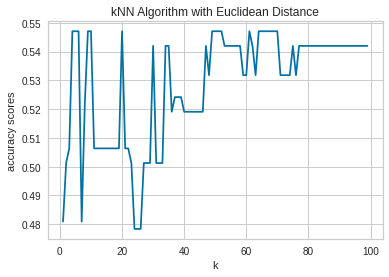

In [ ]:
# --- Split ---
#Droping the Survivid colums from the feature coloums
X = df.drop(['Survived'],axis=1)
#Setting the target value as Survived
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

### Create a list of k values to test
k_values = [i for i in range(1, 100)]
### Create a list to store the accuracy scores
accuracy_scores = []
### Loop through each k value and calculate the accuracy score
for k in k_values:
    # Train a kNN classifier with k neighbors using the training set
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    # Use the trained classifier to predict the class labels of the test set
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy_scores of the prediction 
    accuracy_scores.append(accuracy_score(y_test, y_pred))
# Plot the graph of k versus accuracy scores
plt.plot(k_values, accuracy_scores)
plt.xlabel('k')
plt.ylabel('accuracy scores')
plt.title('kNN Algorithm with Euclidean Distance')
plt.show()

In [ ]:
"""
1. b) Model 2 - Linear regression & Logistic regression.
•Plot the regression line over the training dataset as per the obtained␣
↪model.
•Plot graph of learning rate ￿ versus RMSE for test dataset [for Linear␣
↪regression only]
•Plot graph of training size versus accuracy for the test dataset
"""

## <font color="green"><b>Linear Regression</b></font>

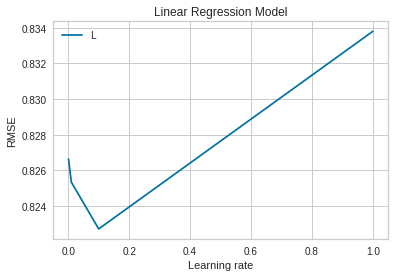

In [ ]:
### Create a list of learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1.0]

### Create a array to store the RMSE scores
rmse_values = []


### Loop through each learning rate and calculate the RMSE score
for lr in learning_rates:
    # Fit a linear regression model to the training dataset
    model = SGDRegressor(alpha=lr)
    model.fit(X_train, y_train)

    # Predict the output values for the test dataset
    y_pred = model.predict(X_test)  

    # Predict the output values for the test dataset
    y_test_pred = model.predict(X_test)

    # Calculate the root mean squared error (RMSE) between the predicted output values and the true output values for the test dataset
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_values.append(rmse)

# Plot the graph of learning rate versus RMSE
plt.plot(learning_rates, rmse_values)
plt.xlabel('Learning rate')
plt.ylabel('RMSE')
plt.title('Linear Regression Model')
plt.legend("Learning Rate vs RMSE")
plt.show()

## <font color="green"><b>Logestic Regression</b></font>


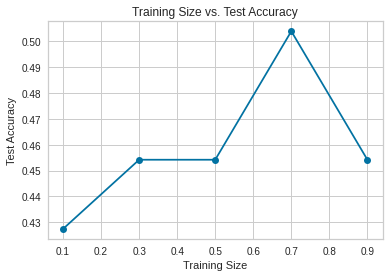

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Define a list of training set sizes to test
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

# Define a list to store the accuracy for each training set size

# Loop through the different training set sizes
for size in train_sizes:
    # Split the training set further
    X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Train the model on the smaller training set
    model.fit(X_train_small, y_train_small)
    
    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    # Calculate the accuracy on the test set
    test_acc.append(accuracy_score(y_test, y_test_pred))


# Plot the graph of training size versus accuracy for the test set
plt.plot(train_sizes, test_acc, 'bo-')
plt.title('Training Size vs. Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Test Accuracy')
plt.show()


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

### Calculate the Training set score of the model
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')

### Calculate the accuracy of the model
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')

Training set score: 0.53 

Test set score: 0.45 

Accuracy Score: 0.45 



In [ ]:
'''
Model 3 - SVM
• Linear kernel and 70:30 training-testing split to generate the model.
• Plot a graph with varied values for penalty term C and show how the precision and recall change.
'''

## <font color="green"><b>SVM</b></font>


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM model with a linear kernel
model = SVC(kernel='linear', C=1.0)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.84      0.66       159
           2       0.54      0.71      0.61       108
           3       0.00      0.00      0.00       126

    accuracy                           0.54       393
   macro avg       0.36      0.52      0.42       393
weighted avg       0.36      0.54      0.43       393



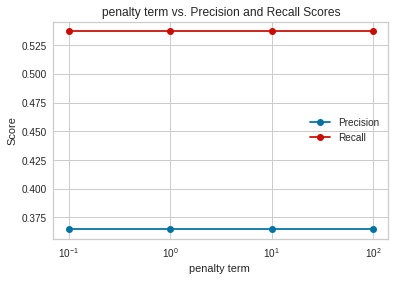

In [ ]:
# Define a list of penalty terms to test
C_values = [0.1, 1, 10, 100]

# Define empty lists to store the precision and recall scores for each C value
precision_scores = []
recall_scores = []

# Loop through the different C values
for C in C_values:
    # Create an SVM model with a linear kernel and the current C value
    model = SVC(kernel='linear', C=C)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate the precision and recall scores
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append the scores to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)


# Plot the graph of C versus precision and recall scores
plt.plot(C_values, precision_scores, 'bo-', label='Precision')
plt.plot(C_values, recall_scores, 'ro-', label='Recall')
plt.xscale('log')
plt.title('penalty term vs. Precision and Recall Scores')
plt.xlabel('penalty term ')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
'''
d) Model 4 - PCA
• Find the eigenvalues and corresponding eigenvectors for the first 3 principal components.
• Visualize the reconstructed image with reduced principal components.
• Plot the graph PC versus reconstruction error for varied number of principal components.
'''

## <font color="green"><b>PCA</b></font>


In [ ]:
# Perform PCA to reduce the dimensionality to 3 principal components
pca = PCA(n_components=2)
pca.fit(df)

### Transform the data
df_pca = pca.transform(df)

X_pca = pca.fit_transform(X)
# Print the eigenvalues and corresponding eigenvectors
print("Eigenvalues:", pca.explained_variance_)
print("Eigenvectors:\n", pca.components_)

Eigenvalues: [0.64750527 0.22675736]
Eigenvectors:
 [[ 0.99680888  0.07982521]
 [-0.07982521  0.99680888]]


###*Data* Manipulation

Original set  --->  (1309, 2) (1309,) 
Training set  --->  (1047, 2) (1047,) 
Testing set   --->  (262, 2)  (262,)


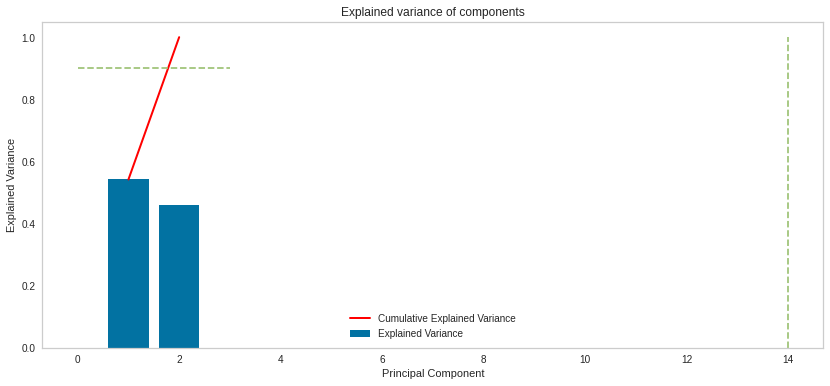

In [ ]:
#Splitting the data intro training & testing sets
target = 'Survived'
df = df.copy()
X = df.drop([target],axis=1)
Y = df[target]


Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

#Standardization

std = StandardScaler()
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)


pca = PCA().fit(Train_X_std)
fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([14,14],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()


In [ ]:
X_reconstructed = pca.inverse_transform(Train_X_std)


# Flatten the array to a 1D array of size (1047*2=2094)
flat_image = X_reconstructed.flatten()

# Reshape the flattened array to the original shape (1047, 2)
reshaped_image = flat_image.reshape(1047, 2)

# Plot the image using Matplotlib
plt.imshow(reshaped_image, cmap='gray')
plt.show()

PCA
Explained variance: [0.95605595 0.04324137]


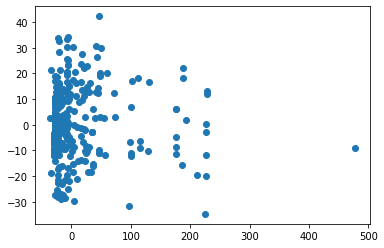

Truncated SVD
Explained variance: [0.89619968 0.10269811]


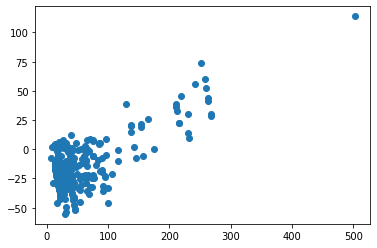

In [ ]:
### Perform dimensionality reduction using PCA
### Create a PCA instance
df_without_sex_embarked = df.drop(['Sex', 'Embarked'], axis=1)
pca = PCA(n_components=2)
pca.fit(df_without_sex_embarked)


### Transform the data
df_pca = pca.transform(df_without_sex_embarked)
# print(df_pca)


### Plot the transformed data
print(f"PCA")
print(f"Explained variance: {pca.explained_variance_ratio_}")
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.show()


### Perform dimensionality reduction using Truncated SVD
### Create a Truncated SVD instance
svd = TruncatedSVD(n_components=2)

### Fit the Truncated SVD instance to the data
svd.fit(df_without_sex_embarked)

### Transform the data
df_svd = svd.transform(df_without_sex_embarked)
# print(df_svd)

### Plot the transformed data
print(f"Truncated SVD")
print(f"Explained variance: {svd.explained_variance_ratio_}")
plt.scatter(df_svd[:,0], df_svd[:,1])
plt.show()


## <font color="green"><b>Random Forest Classifier (criterion = 'entropy')</b></font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

